# TPS Jun 22 - EDA

some initial EDA 
- examine missing values
- can we learn anything about the distribution of the missing values?

import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [6]:
input_path = Path('./input')

data = pd.read_csv(input_path / 'data.csv', index_col='row_id',
                   dtype = {
                       'row_id' : 'int',
                         'F_2_0' : 'category',
                         'F_2_1' : 'category',
                         'F_2_2' : 'category',
                         'F_2_3' : 'category',
                         'F_2_4' : 'category',
                         'F_2_5' : 'category',
                         'F_2_6' : 'category',
                         'F_2_7' : 'category',
                         'F_2_8' : 'category',
                         'F_2_9' : 'category',
                         'F_2_10' : 'category',
                         'F_2_11' : 'category',
                         'F_2_12' : 'category',
                         'F_2_13' : 'category',
                         'F_2_14' : 'category',
                         'F_2_15' : 'category',
                         'F_2_16' : 'category',
                         'F_2_17' : 'category',
                         'F_2_18' : 'category',
                         'F_2_19' : 'category',
                         'F_2_20' : 'category',
                         'F_2_21' : 'category',
                         'F_2_22' : 'category',
                         'F_2_23' : 'category',
                         'F_2_24' : 'category',
                     },)
submission = pd.read_csv(input_path / 'sample_submission.csv', index_col='row-col')

## Visualize missing values

They appear randomly distributed, and uncorrelated between columns

<AxesSubplot:>

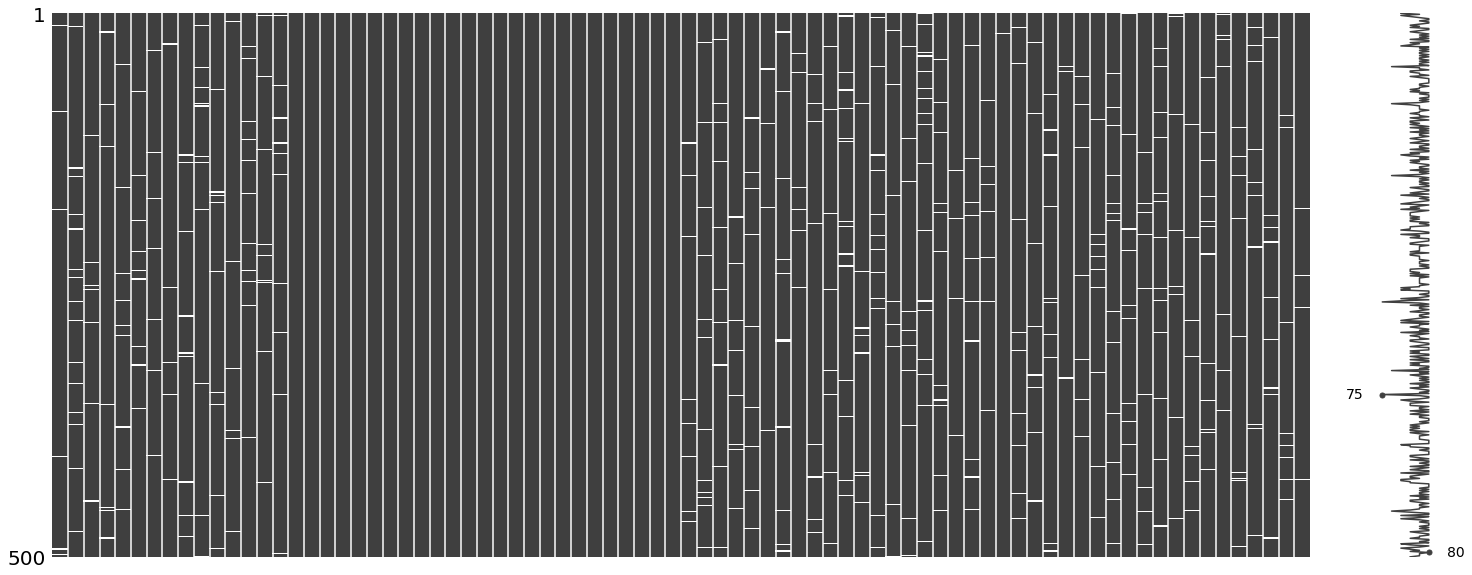

In [7]:
msno.matrix(data.sample(500))

msno.heatmap(data)

### Describe data
- F2* not missing any data
- F1,F3,F4 columns seem to be missing roughly 18K rows each. 
- columns all mean zero
- scale doesnt vary much between columns



In [9]:
data.describe()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,981603.000,981784.000,981992.000,981750.000,981678.000,981911.000,981867.000,981872.000,981838.000,981751.000,982039.000,981830.000,981797.000,981602.000,981961.000,981971.000,981655.000,981944.000,981946.000,981627.000,981702.000,981808.000,981987.000,981902.000,981894.000,981800.000,981612.000,981703.000,981940.000,981861.000,981762.000,981878.000,981722.000,981911.000,981800.000,981752.000,981604.000,981823.000,981794.000,981855.000,981872.000,981836.000,981505.000,981971.000,982043.000,981937.000,981675.000,981986.000,981824.000,981735.000,981775.000,981881.000,981694.000,982005.000,981733.000
mean,-0.001,0.002,0.001,0.001,0.002,0.001,-0.000,-0.064,-0.000,0.000,0.000,-0.001,-0.061,-0.067,-0.001,0.002,-0.001,0.001,0.001,0.001,-0.002,0.000,0.002,0.001,-0.000,0.002,0.001,0.000,-0.002,0.001,-0.002,-0.001,-0.000,0.000,-0.065,0.002,-0.059,0.000,0.000,-0.001,0.327,-0.331,-0.086,-0.195,0.333,0.336,0.004,0.334,-0.072,-0.080,0.038,0.552,0.334,0.330,0.037
std,1.001,1.000,1.000,1.000,1.001,1.000,1.000,0.726,1.001,1.000,0.999,1.000,0.712,0.746,1.000,1.001,1.000,0.999,1.000,1.000,1.000,0.999,1.001,1.001,1.002,1.000,0.999,1.000,1.000,0.999,1.000,1.000,1.000,1.000,0.739,0.999,0.697,0.999,1.000,1.000,2.322,2.406,0.837,0.821,2.374,2.353,2.292,2.359,0.778,0.807,0.707,4.997,2.383,2.364,0.776
min,-4.664,-4.791,-4.871,-5.053,-5.363,-5.508,-5.199,-6.990,-4.567,-4.998,-4.795,-4.612,-7.063,-6.896,-4.630,-4.694,-4.466,-4.886,-4.677,-5.009,-4.871,-5.019,-5.053,-5.508,-4.846,-4.626,-4.598,-4.533,-4.747,-5.363,-4.448,-4.822,-4.806,-5.199,-6.069,-4.998,-7.147,-4.741,-5.251,-4.891,-12.878,-12.532,-9.663,-9.942,-12.825,-12.537,-11.132,-11.678,-10.092,-9.864,-10.354,-26.277,-11.524,-10.662,-9.984
25%,-0.675,-0.672,-0.674,-0.672,-0.672,-0.674,-0.675,-0.500,-0.674,-0.674,-0.674,-0.677,-0.489,-0.514,-0.676,-0.675,-0.675,-0.673,-0.674,-0.673,-0.676,-0.675,-0.673,-0.676,-0.675,-0.672,-0.675,-0.674,-0.676,-0.673,-0.675,-0.675,-0.675,-0.674,-0.507,-0.671,-0.480,-0.674,-0.674,-0.675,-1.168,-1.962,-0.608,-0.686,-1.191,-1.267,-1.571,-1.224,-0.518,-0.577,-0.386,-2.791,-1.269,-1.299,-0.396
50%,-0.001,0.002,0.001,0.000,0.003,0.000,0.001,0.001,-0.000,0.001,0.001,-0.001,0.001,-0.001,-0.000,0.003,0.000,0.000,0.001,0.003,-0.002,0.001,0.001,-0.000,-0.002,0.002,0.000,0.002,-0.002,0.000,-0.001,-0.002,-0.000,0.000,0.001,0.002,-0.001,0.000,-0.000,-0.000,0.421,-0.356,-0.062,-0.137,0.425,0.303,-0.072,0.379,0.018,-0.028,0.103,0.203,0.354,0.295,0.131
75%,0.673,0.676,0.674,0.675,0.677,0.676,0.674,0.444,0.674,0.676,0.674,0.674,0.436,0.455,0.673,0.677,0.674,0.675,0.676,0.677,0.672,0.673,0.676,0.676,0.674,0.675,0.675,0.674,0.674,0.674,0.674,0.675,0.674,0.675,0.451,0.676,0.428,0.674,0.675,0.674,1.909,1.276,0.485,0.369,1.943,1.918,1.521,1.926,0.475,0.480,0.530,3.646,1.947,1.917,0.574
max,5.039,5.043,5.130,5.462,4.857,4.961,4.958,2.528,4.886,4.789,4.914,4.818,2.301,2.543,4.816,4.587,4.851,4.763,4.988,4.722,5.039,4.525,5.462,5.107,5.101,5.130,4.685,4.943,4.710,4.820,5.248,4.839,5.058,4.961,2.666,6.032,2.392,4.967,4.809,4.981,10.657,11.674,2.909,2.582,11.927,13.540,11.525,12.536,2.607,2.815,2.548,31.229,11.342,11.901,2.584


In [10]:
data.select_dtypes(include='category').describe()

,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,16,15,11,15,17,13,13,17,14,12,18,14,16,16,14,14,14,13,15,14,15,16,16,12,18
top,2,2,0,2,2,1,1,2,0,1,3,2,2,2,1,1,1,0,1,1,2,1,0,0,3
freq,211333,227543,395453,246615,200033,318347,316158,234261,392025,353025,216301,255549,239136,248707,292019,285985,289990,336592,307140,289355,256171,261241,292432,590549,216934


### Check correlations

- all columns uncorrelated except for F4*

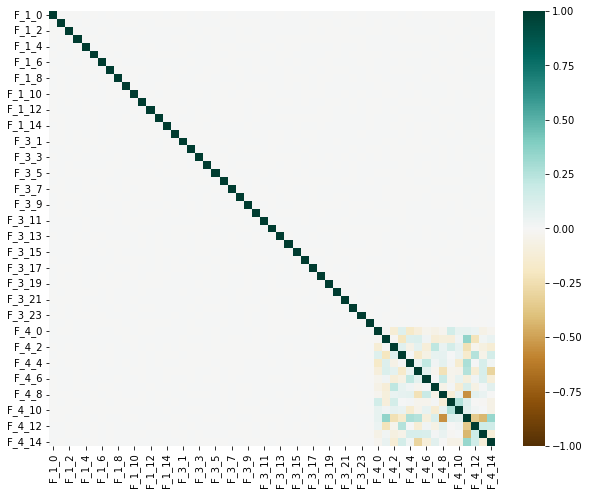

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

corr = data.corr()
sns.heatmap(corr, vmin=-1, vmax=1,  cmap='BrBG')

plt.show()

In [ ]:
data.select_dtypes(include='number').isnull().sum()

In [ ]:
data.select_dtypes(include='number').isnull().sum().mean()

In [18]:
train = data[~data.isnull().any(axis=1)]

In [19]:
display(train)

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0.533,1.662,0.601,-0.662,0.034,-0.056,-1.782,0.327,1.583,-0.346,2.268,0.606,-0.838,-1.640,-0.168,0,4,1,1,2,3,1,2,8,2,2,7,1,1,4,3,4,0,0,2,3,2,1,0,5,0.596,-0.355,0.836,0.449,0.424,0.297,-0.763,-0.203,-0.638,-0.887,0.747,-0.007,-0.609,-0.281,-0.409,2.472,-0.384,0.132,0.778,0.682,-0.868,-0.072,0.659,-0.391,-0.931,6.320,-3.385,-1.238,-0.229,0.228,-2.149,4.227,-1.137,0.171,0.703,-0.780,4.722,1.836,-6.409,0.539
8,-0.335,-0.802,-0.754,-0.369,0.781,1.025,-0.394,-0.588,0.092,0.107,0.335,0.018,0.267,0.084,2.052,8,0,0,5,1,1,0,5,0,2,4,1,5,3,2,0,2,1,0,0,2,6,0,0,2,0.530,0.291,0.108,-0.364,-1.150,-1.314,-1.548,0.758,-0.171,-0.732,-0.593,0.756,0.718,1.281,-2.409,0.163,-2.438,-1.238,0.205,1.068,-0.943,0.576,0.372,1.115,-0.102,-0.092,2.166,-1.196,0.111,2.701,1.076,2.536,-0.617,0.108,-1.064,-0.129,3.340,-0.966,0.900,-0.038
9,0.144,-0.580,-0.897,-0.550,1.231,-0.474,-1.231,0.475,0.367,-0.257,-1.069,-0.062,-0.595,-0.144,1.540,1,1,2,4,4,2,2,1,3,1,2,3,7,1,3,4,3,0,2,2,1,6,0,0,2,-0.059,0.459,1.702,-1.052,0.722,-0.616,-0.595,-1.305,-0.615,-1.096,-0.858,0.943,1.138,0.300,-0.662,-1.059,-1.133,-1.066,0.280,-0.017,0.137,-0.033,-0.443,0.940,3.467,0.996,-5.038,-0.698,0.269,-0.126,-1.630,1.543,0.824,0.037,-1.029,0.637,0.682,1.675,-1.291,0.553
15,0.386,-0.164,-1.209,0.769,-2.201,-1.498,0.120,0.866,1.371,1.627,-0.124,-1.214,-0.182,0.023,-0.288,1,1,1,2,4,2,3,1,0,1,3,2,8,2,0,1,0,0,0,1,0,5,1,0,4,2.603,-0.774,1.469,-0.170,1.246,0.400,0.208,0.854,-0.905,-0.089,-0.959,1.209,0.091,-0.073,0.450,0.950,-0.998,0.179,-0.894,0.372,0.496,0.076,1.431,1.442,0.107,2.877,0.788,0.917,-0.186,1.715,-0.100,-0.854,-1.152,0.480,-0.112,0.154,3.836,-4.028,-2.736,0.191
16,0.641,0.715,0.958,0.766,-1.713,-1.082,0.944,0.329,2.208,-1.027,-0.097,0.334,-0.464,0.208,-0.859,7,1,0,2,3,1,2,6,0,4,5,2,2,1,3,1,2,4,1,0,1,4,0,1,3,-0.729,-0.060,0.137,0.302,0.453,-0.444,2.191,-0.631,0.823,-0.161,-1.571,-0.218,-0.510,-0.869,1.088,0.223,-1.272,0.835,-0.246,-1.375,-0.745,-1.542,-1.367,0.755,0.251,-1.914,-0.529,0.012,-1.379,0.541,2.924,0.675,1.680,0.131,0.422,0.586,-0.348,-0.783,3.389,-0.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999989,0.170,-0.211,-2.405,-0.508,0.408,0.747,1.239,0.508,-1.320,-0.398,1.300,1.445,0.652,0.319,-0.439,3,3,1,2,4,2,2,1,3,1,3,3,5,1,1,1,3,0,0,1,1,0,1,0,5,0.838,1.673,-1.736,1.751,0.114,-0.095,0.910,1.211,0.545,-1.656,-0.705,-0.277,-0.554,-0.686,-1.396,1.042,0.196,-0.624,-1.054,-1.197,-0.017,0.528,0.931,-0.573,-0.250,6.668,-2.519,1.374,1.303,-3.362,2.394,-0.949,-4.463,-0.236,-0.334,-1.630,-9.630,4.005,-3.800,-1.961
999995,-0.824,0.286,0.343,-0.437,1.701,-1.069,0.820,-0.168,-0.429,0.844,0.569,0.236,0.540,-0.262,-1.567,4,8,1,4,4,0,1,1,2,1,2,1,0,4,1,1,1,1,2,2,3,0,3,0,6,0.030,-0.699,1.176,-0.622,-1.043,-0.341,0.397,0.347,0.142,-0.162,1.103,1.360,0.336,-1.558,-1.054,-1.484,0.350,1.179,0.184,-0.608,0.576,-0.787,0.421,-0.104,-1.115,1.148,-5.126,0.746,-0.195,2.615,1.800,-0.301,5.340,-0.992,1.279,-0.841,-2.276,1.763,5.325,-0.229
999996,-0.769,-0.387,-1.227,0.601,0.351,0.219,-0.530,0.853,0.609,1.648,-0.040,-1.235,0.834,1.385,-1.575,0,1,1,5,2,1,4,1,1,3,2,3,4,2,1,2,2,0,2,0,3,4,3,0,2,-0.558,-0.578,-0.162,0.507,-1.524,0.35

### Can we infer anything about the distribution of missing values?
- i think they are missing completely at random 
- therefore the marginal distributions (columns and rows) should be binomial

### Marginal probability distribution - rows
- hypothesis p=1/55 (100K missing values, 100K rows, 55 columns)
- Visualize a binomial distribution with p=1/55, n=55
- plot histogram of missing counts by row
- seems a spot on match!

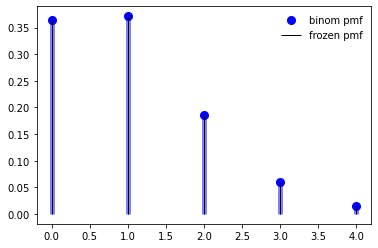

In [54]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n = 55
p = 1/55
x = np.arange(binom.ppf(0.05, n, p),
              binom.ppf(0.999, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

data.isnull().sum(axis=1).hist()

In [55]:
np.arange(binom.ppf(0.05, n, p),
              binom.ppf(0.995, n, p))

array([0., 1., 2., 3.])

In [53]:
binom.ppf(0.995, n, p)

4.0

In [56]:
binom.pmf(range(0,6), n, p)

array([0.36450951, 0.37125969, 0.18562985, 0.06073075, 0.01462037,
       0.00276162])

<AxesSubplot:>

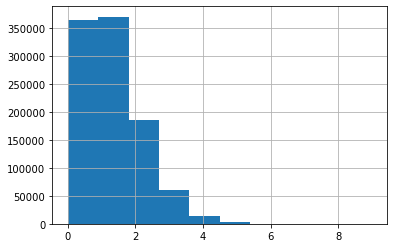

In [23]:
data.isnull().sum(axis=1).hist()

### marginal distribution - columns
- now n is 100K; large, therefore binomial looks normal
- histogram looks normalish; note with 100K rows we expect little deviation

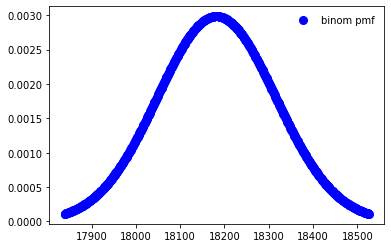

In [62]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n = 1E6
p = 2/110
x = np.arange(binom.ppf(0.005, n, p),
              binom.ppf(0.995, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
#ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


#rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
#        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

<AxesSubplot:>

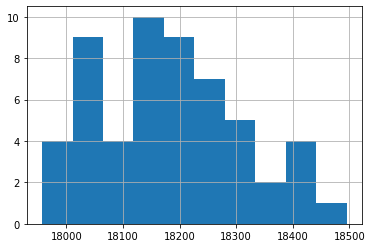

In [34]:
data.select_dtypes(exclude='category').isnull().sum(axis=0).hist()